In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
print(response.json())

[{'month_name': 'January', 'year': '2014', 'query_count': '223', 'query_text': 'ebid'}, {'month_name': 'January', 'year': '2014', 'query_count': '112', 'query_text': 'property maps'}, {'month_name': 'January', 'year': '2014', 'query_count': '97', 'query_text': 'maps'}, {'month_name': 'January', 'year': '2014', 'query_count': '90', 'query_text': 'property tax'}, {'month_name': 'January', 'year': '2014', 'query_count': '76', 'query_text': 'jobs'}, {'month_name': 'January', 'year': '2014', 'query_count': '75', 'query_text': 'employment'}, {'month_name': 'January', 'year': '2014', 'query_count': '73', 'query_text': 'human resources'}, {'month_name': 'January', 'year': '2014', 'query_count': '62', 'query_text': 'police'}, {'month_name': 'January', 'year': '2014', 'query_count': '61', 'query_text': 'criminal court clerk'}, {'month_name': 'January', 'year': '2014', 'query_count': '53', 'query_text': 'media releases'}, {'month_name': 'January', 'year': '2014', 'query_count': '50', 'query_text'

In [7]:
#pulls apart a dictionary and keeps a running total
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count #searching for a key [text] then add an amount to existing amount for count, 
                                   #if its not there we create the key in the else statement
    else:
        search_dict[text] = count#create the key here
#search_dict...a large amount

In [8]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [9]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


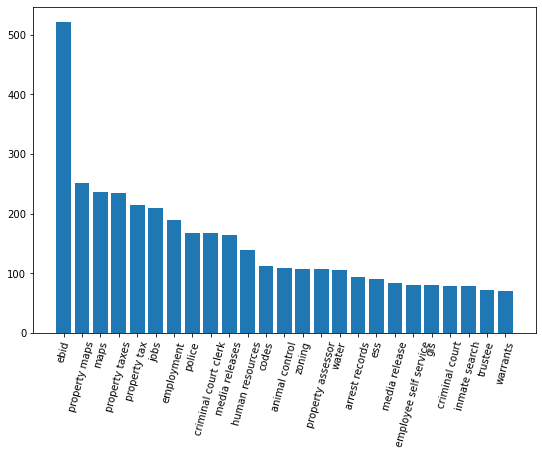

In [10]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

# Question 1

In [ ]:
#Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [11]:
argsq1 = '?year=2016&query_text=fire'

In [12]:
#args = '?month=7&query_text=ess'...to change what I want to pull in from the website...replaces the parameters arguments

In [13]:
searchq1 = endpoint + argsq1

In [14]:
responseq1 = requests.get(searchq1)

In [15]:
responseq1

<Response [200]>

In [16]:
resultsq1 = responseq1.json()

In [17]:
question1_df = pd.DataFrame.from_dict(resultsq1)

In [18]:
question1_df.sort_values(by = 'query_count',
                         axis=0,
                         ascending=False)

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire
2,March,2016,32,fire
10,November,2016,32,fire
5,June,2016,31,fire
3,April,2016,26,fire
4,May,2016,24,fire


In [19]:
#question1_df[['month_name', 'year', 'query_count', 'query_text']]

# Question 2

In [20]:
#Make an API request that returns all the times a query was run more than 100 times in a month. 
#How many times did this occur?

In [21]:
argsq2 = '?$where=query_count>100&$limit=43177'
#'?query_count>100'
#$limit=43177

In [22]:
searchq2 = endpoint + argsq2

In [23]:
responseq2 = requests.get(searchq2)

In [24]:
responseq2

<Response [200]>

In [25]:
resultsq2 = responseq2.json()

In [26]:
question2_df = pd.DataFrame.from_dict(resultsq2)

In [27]:
question2_df.sort_values(by = 'query_count',
                        axis = 0,
                        ascending = False)

,month_name,year,query_count,query_text,month
1237,October,2018,816,annual enrollment,NaN
1236,September,2018,750,annual enrollment,NaN
1235,September,2017,704,annual enrollment,NaN
1234,October,2019,692,directory,10
1233,October,2017,648,annual enrollment,NaN
...,...,...,...,...,...
27,July,2020,101,Birth certificate,7
28,February,2021,101,Trash pickup,2
29,March,2021,101,Property maps,3
30,May,2021,101,water,5


In [28]:
question2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   1241 non-null   object
 1   year         1241 non-null   object
 2   query_count  1241 non-null   object
 3   query_text   1241 non-null   object
 4   month        470 non-null    object
dtypes: object(5)
memory usage: 48.6+ KB


In [29]:
# This occurred 1241 times

# Question 3

In [30]:
#Make another API request that returns all the times "codes" was searched more than 100 times in a month. 
#How many times did this occur?

In [31]:
argsq3 = '?$where=query_count>100&$limit=43177&query_text=codes'

In [32]:
searchq3 = endpoint + argsq3

In [33]:
responseq3 = requests.get(searchq3)

In [34]:
responseq3

<Response [200]>

In [35]:
resultsq3 = responseq3.json()

In [36]:
question3_df = pd.DataFrame.from_dict(resultsq3)

In [56]:
question3_df.sort_values(by = 'query_count',
                        axis = 0,
                        ascending = False).head(10)

,month_name,year,query_count,query_text,month
54,May,2017,269,codes,NaN
53,August,2018,225,codes,NaN
52,August,2017,222,codes,NaN
51,July,2017,215,codes,NaN
50,June,2020,208,codes,6
49,October,2017,206,codes,NaN
48,June,2018,204,codes,NaN
47,November,2018,201,codes,NaN
46,June,2017,192,codes,NaN
45,January,2021,191,codes,1


In [38]:
question3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   55 non-null     object
 1   year         55 non-null     object
 2   query_count  55 non-null     object
 3   query_text   55 non-null     object
 4   month        28 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [39]:
# This happened 55 times

# Question 4

In [40]:
#Make an API request that returns the entire Top 500 Monthly Searches dataset. 
#Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [41]:
argsq4 = '?$limit=43177'

In [42]:
searchq4 = endpoint + argsq4

In [43]:
responseq4 = requests.get(searchq4)

In [44]:
responseq4

<Response [200]>

In [45]:
resultq4 = responseq4.json()

In [46]:
q4df = pd.DataFrame.from_dict(resultq4)

In [47]:
q4df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43172,June,2021,8,Register,6
43173,June,2021,8,Prices,6
43174,June,2021,8,pool permit,6
43175,June,2021,8,property owner,6


In [48]:
#question4_df = pd.DataFrame.from_dict(resultq4)
#question4_df.head(10)

In [49]:
mapsdf = q4df[q4df['query_text']=='maps']#subsetting for 'maps' in the query_text column
#mapsdf =

In [50]:
type('query_count')

str

In [51]:
#int('query_count')
mapsdf['query_count'] = mapsdf['query_count'].astype('int')

<ipython-input-51-2597b336f348>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapsdf['query_count'] = mapsdf['query_count'].astype('int')


In [59]:
mapsdf = mapsdf.groupby('month_name', as_index = False).sum()
mapsdf
#as_index=False makes a normal index in the dataframe


,month_name,query_count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


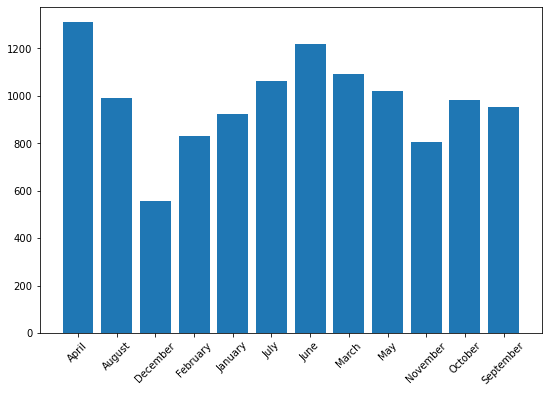

In [58]:
plt.figure(figsize=(9,6))
plt.bar('month_name', 'query_count', data = mapsdf)
plt.xticks(rotation = 45);

In [54]:
#{'month_name': 'January', 'year': '2014', 'query_count': '13', 'query_text': 'metro maps'}

In [55]:
### search_dict = 
#for line in resultq4:
#    count = int(line.get('query_count'))
#    month = line.get('month_name')
#    if month in search_dict:
#        search_dict[month] += count #searching for a key [text] then add an amount to existing amount for count, 
                                   #if its not there we create the key in the else statement
#    else:
#        search_dict[month] = count
#    print(month, count)
#search_dict
#text = 'maps'
#query_count